In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


In [2]:
datasetName="/stor/public/hcad/heart_heart_HCLFetalHeart2/heart_heart_HCLFetalHeart2"

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv.gz"),header = TRUE, sep='\t',row.names = 1)

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

# analysis

In [5]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [6]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.1268”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.5666e-16”Centering and scaling data matrix


In [7]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  TMSB4X, ACTB, ACTG1, FTL, SPARC, RNASE1, COL3A1, A2M, ESAM, RAMP2 
	   HLA-E, FN1, COL1A2, PECAM1, TM4SF1, SAT1, SRGN, HSPG2, CD93, C1QB 
	   HLA-B, C1QC, B2M, SH3BGRL3, CD74, MGP, EMCN, CSF1R, IFITM2, ECSCR 
Negative:  MYL7, TPM1, TNNC1, ACTC1, TNNT2, MYL3, TNNI1, CSRP3, MYH7, MYL4 
	   MYL2, CRYAB, FABP3, TNNI3, PLN, MYL9, SLC25A4, MDH1, HSPB7, SMPX 
	   NPPA, HSPB3, SH3BGR, FHL2, MGST3, COX7C, CKM, CYCS, PGAM2, MB 
PC_ 2 
Positive:  C1QB, CD74, C1QC, HLA-DRA, CSF1R, C1QA, TYROBP, AIF1, VSIG4, HLA-DRB1 
	   CYBB, RNASE6, FCER1G, MS4A6A, FOLR2, LAPTM5, MRC1, MS4A7, MAF, CX3CR1 
	   GPR34, CD14, CD53, MS4A4A, HLA-DPA1, FCGR2A, FCGR3A, SPP1, ITGB2, HLA-DMB 
Negative:  COL3A1, SPARC, COL1A2, COL1A1, MGP, DCN, FN1, COL5A1, PTN, PLAC9 
	   LUM, C7, POSTN, COL6A3, COL5A2, ID3, ISLR, SPARCL1, ELN, OLFML3 
	   FBN1, OGN, TIMP1, ASPN, MFAP4, GPC3, VCAN, SERPINE2, COL6A1, PXDN 
PC_ 3 
Positive:  ESAM, PECAM1, CDH5, CAV1, ADGRF5, HSPG2, EMCN, CD93, RAMP2, ECSCR 
	   KDR, TIE1, 

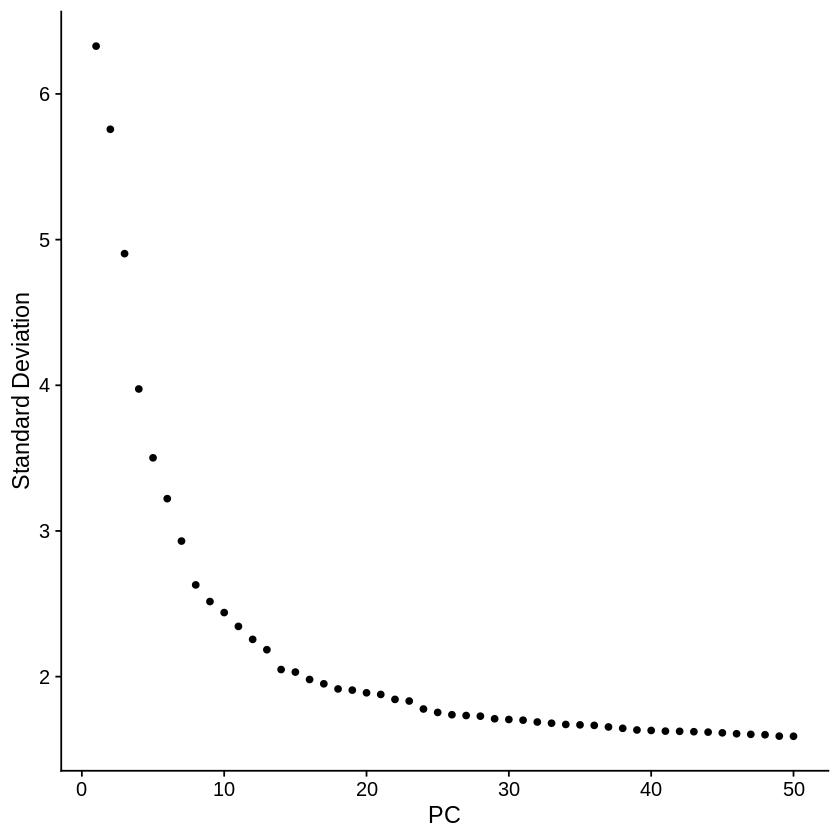

In [8]:
ElbowPlot(dataobj,50) 

In [9]:
pcDim = 40
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”17:59:19 UMAP embedding parameters a = 0.9922 b = 1.112
17:59:19 Read 2678 rows and found 40 numeric columns
17:59:19 Using Annoy for neighbor search, n_neighbors = 30
17:59:19 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
17:59:19 Writing NN index file to temp file /tmp/RtmpCqJD7k/file5efb244ce138
17:59:19 Searching Annoy index using 1 thread, search_k = 3000
17:59:20 Annoy recall = 100%
17:59:20 Commencing smooth kNN distance calibration using 1 thread
17:59:21 Initializing from normalized Laplacian + noise
17:59:21 Commencing optimizatio

In [10]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

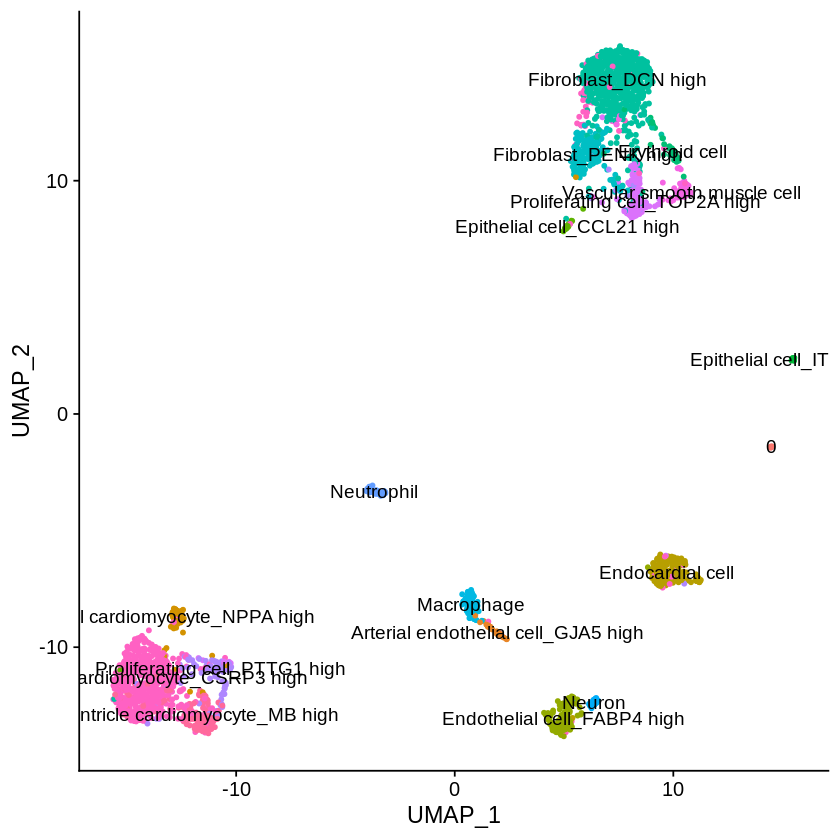

In [11]:
p_umap2

# Clustering

In [12]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


In [19]:
dataobj <- FindClusters(dataobj, resolution = 2.5, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2678
Number of edges: 147089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6099
Number of communities: 21
Elapsed time: 0 seconds


In [20]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

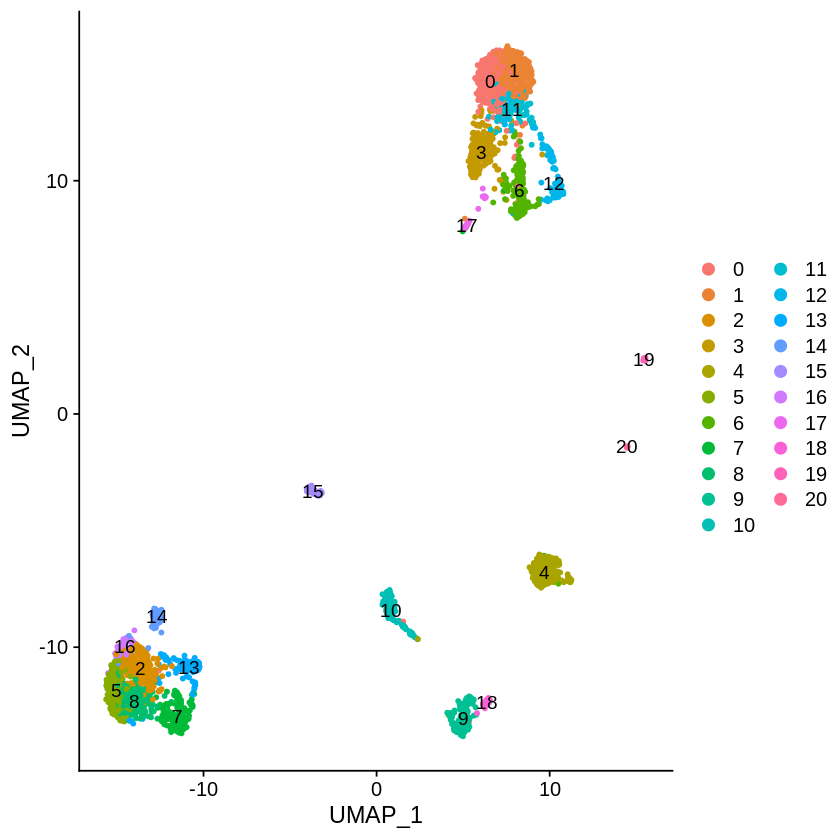

In [21]:
p_umap

# Finding cluster markers 

In [22]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17
Calculating cluster 18
Calculating cluster 19
Calculating cluster 20


# Annotation

In [58]:
dataobj.markers[dataobj.markers['cluster']==6,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CDK1,1.735630e-112,1.789241,0.560,0.057,3.764754e-108,6,CDK1
TOP2A,1.123268e-109,2.082466,0.565,0.061,2.436481e-105,6,TOP2A
RRM2,7.169825e-93,1.542546,0.369,0.025,1.555207e-88,6,RRM2
HMGB2,4.187592e-86,1.613651,0.857,0.227,9.083305e-82,6,HMGB2
KIAA0101,1.429574e-81,1.632058,0.530,0.074,3.100890e-77,6,KIAA0101
H2AFZ,1.799937e-79,1.591727,0.887,0.307,3.904243e-75,6,H2AFZ
NUSAP1,1.162804e-78,1.394838,0.440,0.049,2.522238e-74,6,NUSAP1
AURKB,2.749389e-71,1.370919,0.286,0.020,5.963700e-67,6,AURKB
UBE2C,1.735567e-69,1.635824,0.470,0.068,3.764618e-65,6,UBE2C


In [59]:
dataobj.markers[dataobj.markers['gene']=="DCN",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
DCN,8.252516e-86,1.1625566,0.891,0.388,1.790053e-81,0,DCN
DCN1,2.144933e-143,1.5561894,0.990,0.376,4.652574e-139,1,DCN
DCN2,2.246447e-24,0.5202568,0.869,0.417,4.872768e-20,6,DCN
DCN3,2.430459e-30,0.9225163,0.954,0.424,5.271908e-26,11,DCN


In [4]:
new.cluster.ids <- c('Heart-Connective Tissue-Fibrocyte-DCN LUM',
                     'Heart-Connective Tissue-Fibrocyte-DCN LUM',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYH7 TNNT2',
                     'Heart-Connective Tissue-Fibrocyte-PENK SLN',
                     'Heart-Epithelial Tissue-Endocardial cell-LEPR EMCN',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-ACTC1 MYL3',
                     'Heart-Connective Tissue-Fibrocyte-CDK1 TOP2A',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7 TNNC1',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-TNNC1 MYL3',
                     'Heart-Epithelial Tissue-Pericyte-A2M CDH5',
                     'Heart-Connective Tissue-Macrophage-TYROBP C1QB',
                     'Heart-Connective Tissue-Fibrocyte-COL1A2 OGN',
                     'Heart-Musle Tissue-Smooth muscle cell-ACTG2 MYH11',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-PTTG1 UBE2T',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYH6 NPPA',
                     'Heart-Connective Tissue-Neutrophilic granulocyte-HBG1 GYPA',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-TTN SLC8A1',
                     'Heart-Nerve Tissue-Neuron-ELAVL4 LINC00682',
                     'Heart-Epithelial Tissue-Pericyte-ADGRL4 CLDN5',
                     'Heart-Epithelial Tissue-Vascular endothelial cell-TFF3 NTS',
                     'Heart-Epithelial Tissue-Endothelial cell-PRG4 UPK3B')

In [5]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

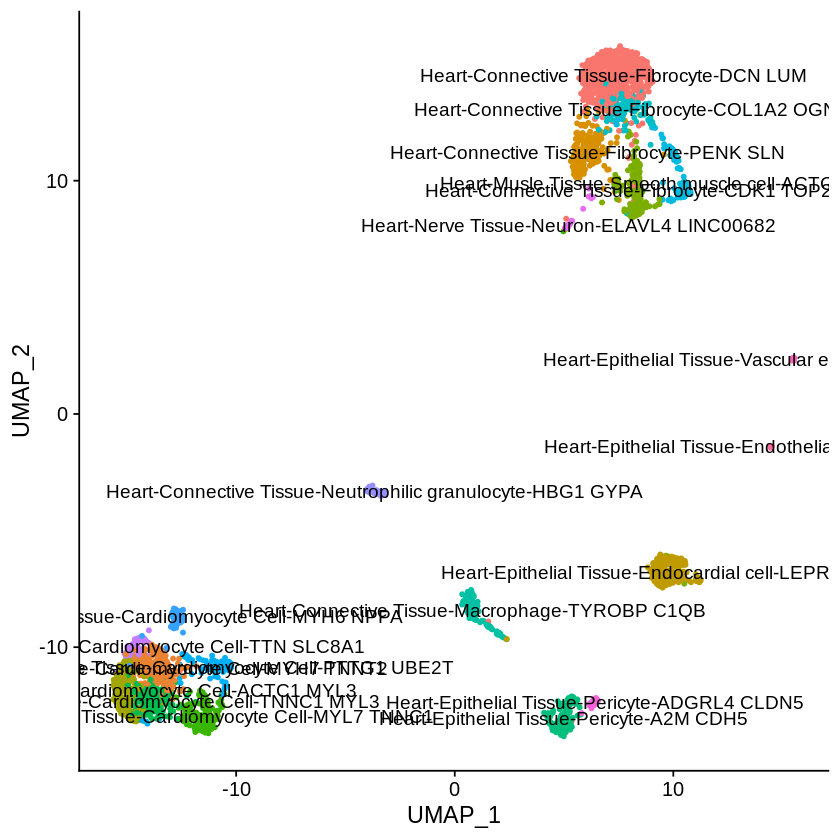

In [62]:
plot

In [63]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = plot, width = 8, height = 5)

In [6]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [7]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [8]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [9]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

# update annotation

In [31]:
dataobj <- readRDS("/stor/public/hcad/db_v1/heart_heart_HCLFetalHeart2/heart_heart_HCLFetalHeart2.seuratobj.dbupload_v1.rds")

In [32]:
table(dataobj$original_name[dataobj$hcad_name == "Heart-Connective tissue-Neutrophilic granulocyte-HBG1 GYPA"])


Neutrophil 
        48 

In [40]:
dataobj$marker_gene[dataobj$hcad_name=="Heart-Connective tissue-Neutrophilic granulocyte-HBG1 GYPA"] <- "SLC25A37"
dataobj$hcad_name[dataobj$hcad_name=="Heart-Connective tissue-Neutrophilic granulocyte-HBG1 GYPA"] <- "Heart-Connective tissue-Neutrophilic granulocyte-SLC25A37"

In [41]:
saveRDS(dataobj, "/stor/public/hcad/db_v1.1/heart_heart_HCLFetalHeart2/heart_heart_HCLFetalHeart2.seuratobj.dbupload_v1.rds")